In [1]:
from discopy import Ty, Id, Box, Diagram, Word

# POS TAGS:
s, n, np, adj, v, vp = Ty('S'), Ty('N'), Ty('NP'), Ty('ADJ'), Ty('V'), Ty('VP')

# WORDS:
Jane = Word('Jane', n)
loves = Word('loves', v)
funny =  Word('funny', adj)
Bob = Word('Bob', n)

vocab = [Jane, loves, funny, Bob]

## Generating sentences from a CFG

Syntax trees for sentence 'Jane loves funny Bob':


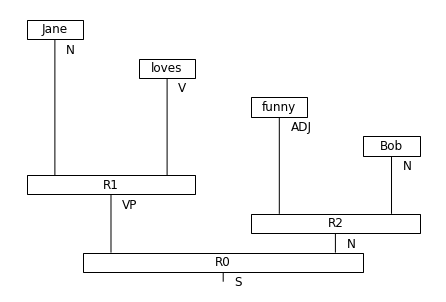

In [2]:
# The CFG's production rules are boxes.

R0 = Box('R0', vp @ n, s)
R1 = Box('R1', n @ v , vp)
R2 = Box('R2', adj @ n, n)
# R3 = Box('R3', n, np)

# A syntax tree is a diagram!

tree0 = R1 @ R2 >> R0
sentence0 = Jane @ loves @ funny @ Bob >> tree0
print("Syntax trees for sentence 'Jane loves funny Bob':")
sentence0.draw(aspect='auto')

In [3]:
import random

class CFG:
    def __init__(self, pos_tags, productions):
        self._pos_tags, self._productions = pos_tags, productions
        
    @property
    def productions(self):
        return self._productions
    
    @property
    def pos_tags(self):
        return self._pos_tags

    def generate(self, start, max_sentences, max_depth):
        prods = self.productions
        n = 0
        while n < max_sentences:
            depth = 0
            sentence = Id(start)
            while depth < max_depth:
                if sentence.dom == Ty():
                    yield sentence
                    n += 1
                    break
                tag = sentence.dom[0]
                random.shuffle(prods)
                for prod in prods:
                    if Ty(tag) == prod.cod:
                        sentence = sentence << prod @ Id(sentence.dom[1:])
                        depth += 1
                        break
                
pos_tags = [s, n, adj, v, vp, np]
productions = [R0, R1, R2, Jane, loves, funny, Bob]
cfg = CFG(pos_tags, productions)
gen = cfg.generate(s, 6, 10)

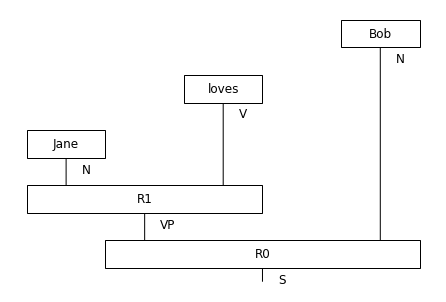

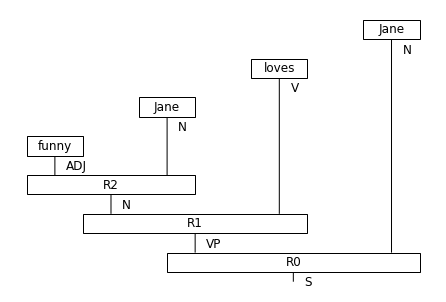

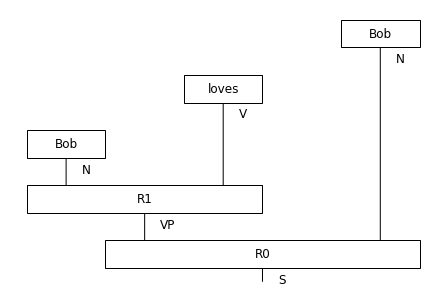

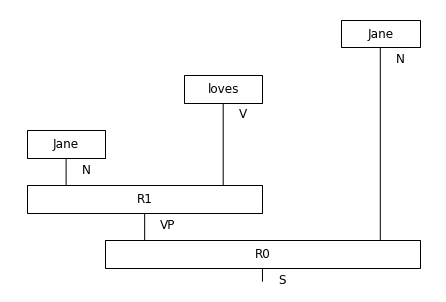

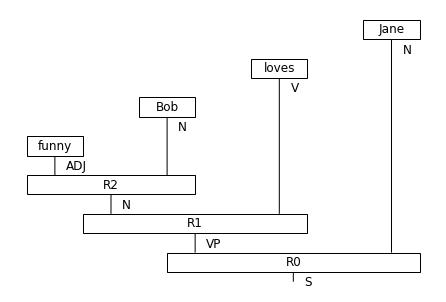

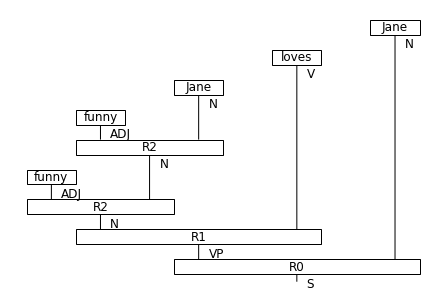

In [4]:
sentences = []
for sentence in gen:
    sentences += [sentence]
    sentence.draw(aspect='auto')

## Getting the corresponding pregroup diagrams with a functor

In [5]:
from discopy.rigid import Cup, Cap, Functor

# Dict from POS tags to Pregroup types:
ob = {n : n, s: s, adj: n @ n.l, v: n.r @ s @ n.l, vp: s @ n.l, np: n}

_Jane = Word('Jane', n)
_loves = Word('loves', n.r @ s @ n.l)
_funny =  Word('funny', n @ n.l)
_Bob = Word('Bob', n)

# Dict from CFG rules to Pregroup reductions: 
ar = {R0: Id(s) @ Cup(n.l, n), 
      R1: Cup(n, n.r) @ Id(s @ n.l),
      R2: Id(n) @ Cup(n.l, n),
      Jane: _Jane, loves: _loves, funny: _funny, Bob: _Bob}
 
T2P = Functor(ob, ar)

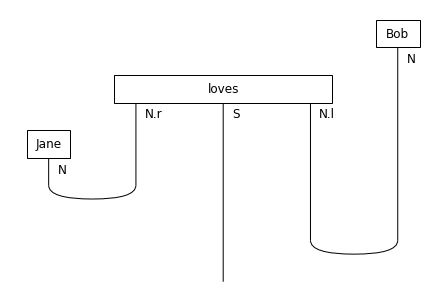

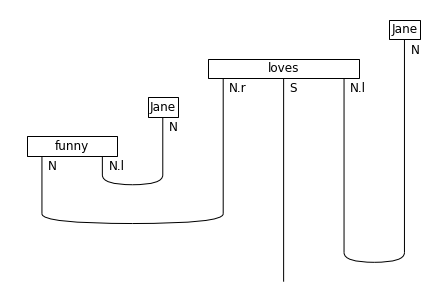

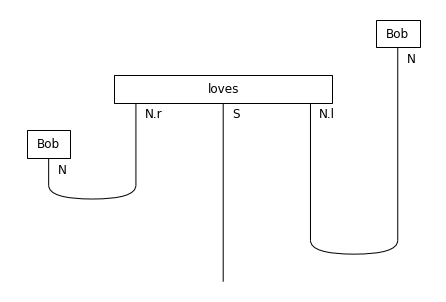

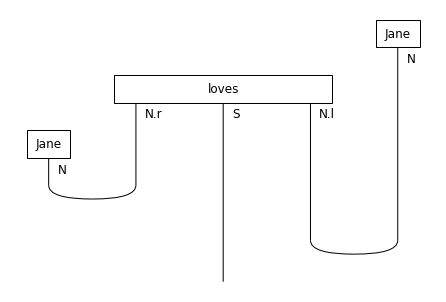

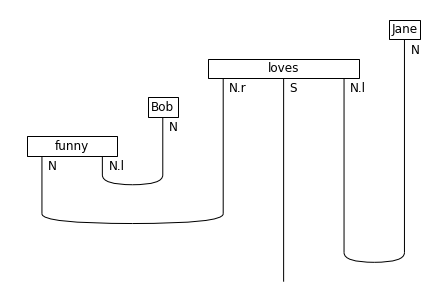

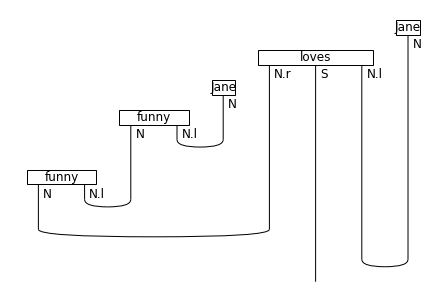

In [6]:
for sentence in sentences:
    T2P(sentence).draw(aspect='auto')

## Removing snakes from all the sentences

In [7]:
# Define the Wiring functor that decomposes a word into monoidal boxes with inputs transposed:

love_box = Box('loves', n @ n, s)
funny_box = Box('funny', n, n)

ob = {n: n, s: s}
ar = {_Jane: _Jane, _Bob: _Bob,
      _loves: Cap(n.r, n) @ Cap(n, n.l) >> Diagram.id(n.r) @ love_box @ Diagram.id(n.l), 
      _funny: Cap(n, n.l) >> funny_box @ Id(n.l)}

W = Functor(ob, ar)

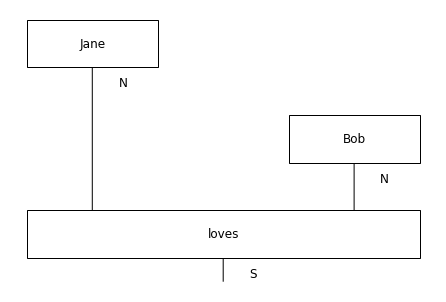

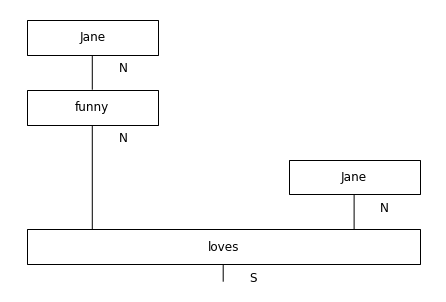

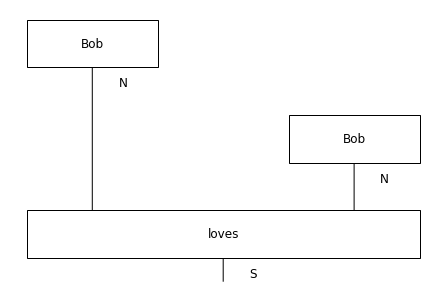

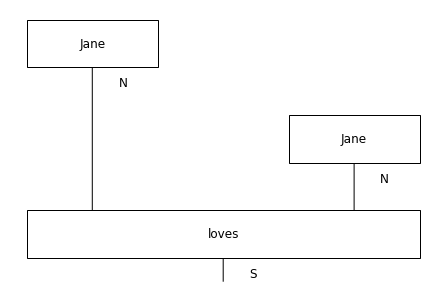

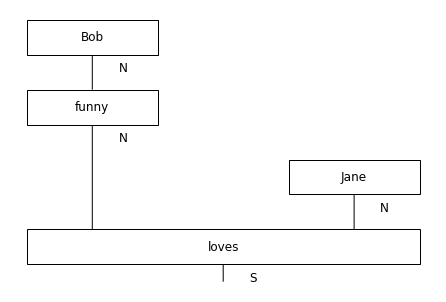

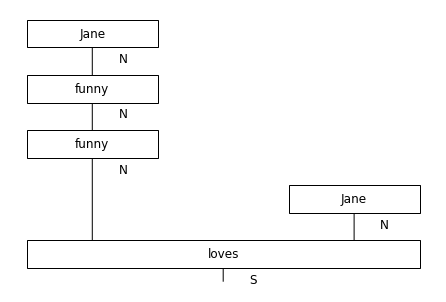

In [8]:
for sentence in sentences:
    W(T2P(sentence)).normal_form().draw(aspect='auto')